$\hspace{7cm}\textbf{Импортируем все необходимые библиотеки:}$

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import cross_val_score, GroupKFold
from sklearn.metrics import accuracy_score 

from matplotlib import pyplot as plt
import seaborn
%matplotlib inline
seaborn.set_style("whitegrid", {'axes.grid' : False})

from sklearn.metrics import roc_auc_score

$\textbf{Функция для перемешки по id пользователей, удобную кросс-валидацию, функцию для вывода качества для всех дней,}$
$\textbf{функция для проверки переобучения :}$

In [66]:
def UserFold( data, splt = 2 ):
    User_Num = dict( [ (y, x) for (x, y) in enumerate( set( data['UserID'] ) ) ] )
    groups_list = [ User_Num[x] for x in data['UserID'] ]
    return GroupKFold( n_splits = splt ).split( data, groups = groups_list )

In [138]:
def Cross_Val_Score_(model, X, y, splt = 3, scoring_ = 'accuracy', U_ID = 'UserID'):
    X_= X.drop( [U_ID], axis=1 )
    accr = cross_val_score(model, X_ ,y, cv=UserFold(X, splt), scoring=scoring_)
    print "Score on the model:", model
    print ""
    print "On all CV:",(accr)
    print "Mean:",(np.mean(accr))

In [156]:
def Quantity_To_Everyday(model, data, usless_par = ['Timezone','t','time','sleep', 'UserID'] , scoring = 'accuracy'): 
    #warning!!! обязательно использование временных ограничений, описанных ниже
    day = {}
    accr = []

    day[12]= data.loc[(data['t'] > _12s) & (data['t'] < _12f)]
    day[13]= data.loc[(data['t'] > _13s) & (data['t'] < _13f)]
    day[14]= data.loc[(data['t'] > _14s) & (data['t'] < _14f)]
    day[15]= data.loc[(data['t'] > _15s) & (data['t'] < _15f)]
    day[16]= data.loc[(data['t'] > _16s) & (data['t'] < _16f)]
    day[17]= data.loc[(data['t'] > _17s) & (data['t'] < _17f)]
    day[18]= data.loc[(data['t'] > _18s) & (data['t'] < _18f)]
    day[19]= data.loc[(data['t'] > _19s) & (data['t'] < _19f)]
    day[20]= data.loc[(data['t'] > _20s) & (data['t'] < _20f)]
    day[21]= data.loc[(data['t'] > _21s) & (data['t'] < _21f)]
    
    for i in range(12,21):
        
        X = day[i].drop( ['Timezone','t','time','sleep','UserID'], axis=1 )
        y = pd.DataFrame(day[i].Timezone)
        if len(X) == 0:
            accr.append(0)
            continue
        y_predict = model.predict(X)
        
        if scoring == 'accuracy':
            accr.append(accuracy_score(y,y_predict))
        if scoring != 'accuracy':
            print 'sorry! not now('
            
    return accr  

In [125]:
def Are_You_Retrained(model, X, y, scoring = 'accuracy'):
    print 'Job function Are_You_Retrained?'
    if scoring == 'accuracy':
        predict_on_train_on_0 = model.predict( X[ pd.DataFrame(y).Timezone == 0 ] )
        print "error on 0 tag" , ( accuracy_score( y[ (pd.DataFrame(y)).Timezone == 0 ], predict_on_train_on_0 ))
        predict_on_train_on_1 = model.predict( X[ pd.DataFrame(y).Timezone == 1 ])
        print "error on 1 tag" ,(accuracy_score( y[ pd.DataFrame(y).Timezone == 1 ], predict_on_train_on_1 ))
        predict_on_train = model.predict( X )
        print "error on train" ,(accuracy_score( y, predict_on_train ))
    if scoring != 'accuracy':
        print 'sorry! Not now'

In [136]:
#TODO функцию для создания подвыборок по дням

$\hspace{5cm}\textbf{Импортируем базу, в которой уже есть столбец с меткой сна:}$

In [71]:
df_for_class_1 = pd.read_csv('union_data.csv')

In [72]:
df_for_class_1.head(10) # смотрим, что у нас за данные в столбцах

,UserID,SessionID,HRVTi,HF_norm,ln_VLF,LF_over_HF,LF_norm,SDNN,WN1,t,...,SI,ln_TP,ln_HF,minHR,time,sleep,unti_id,Timezone,Sex,Age
0,pv_92,1.531312e+12,2.849462,30.852827,5.456647,2.241194,69.147173,18.417277,109.3750,1.531317e+12,...,603.773585,5.618093,2.538927,116.504854,2018-07-11 16:43:16.627,0.0,12994,3.0,0,25
1,pv_92,1.531312e+12,3.089888,41.650201,5.311800,1.400949,58.349799,18.541256,78.1250,1.531317e+12,...,836.363636,5.677170,3.617333,128.205128,2018-07-11 16:43:47.166,0.0,12994,3.0,0,25
2,pv_92,1.531312e+12,4.115942,42.860733,5.836430,1.333138,57.139267,23.285810,85.9375,1.531317e+12,...,448.943662,6.192750,4.140735,128.205128,2018-07-11 16:44:17.088,0.0,12994,3.0,0,25
3,pv_92,1.531312e+12,3.172043,43.376931,5.344657,1.305373,56.623069,18.766367,85.9375,1.531317e+12,...,736.077482,5.674646,3.570246,133.037694,2018-07-11 16:44:47.438,0.0,12994,3.0,0,25
4,pv_92,1.531312e+12,2.779817,43.298677,4.823169,1.309539,56.701323,13.028514,62.5000,1.531317e+12,...,985.384253,5.007397,2.388067,140.845070,2018-07-11 16:45:17.473,0.0,12994,3.0,0,25
5,pv_92,1.531312e+12,2.883495,42.791203,6.024488,1.336929,57.208797,24.179734,117.1875,1.531317e+12,...,647.747314,6.211702,3.595214,125.000000,2018-07-11 16:45:48.241,0.0,12994,3.0,0,25
6,pv_92,1.531312e+12,6.860465,41.533192,6.035504,1.407713,58.466808,24.332028,117.1875,1.531317e+12,...,448.748991,6.232121,3.630250,125.000000,2018-07-11 16:46:18.168,0.0,12994,3.0,0,25
7,pv_92,1.531312e+12,5.052632,42.448857,6.114383,1.355776,57.551143,21.706571,117.1875,1.531317e+12,...,587.384259,6.547733,4.645792,125.000000,2018-07-11 16:47:10.020,0.0,12994,3.0,0,25
8,pv_92,1.531312e+12,5.770833,24.057788,5.954074,3.156658,75.942212,24.955605,132.8125,1.531317e+12,...,583.634176,6.214625,3.317508,114.942529,2018-07-11 16:47:40.328,0.0,12994,3.0,0,25
9,pv_92,1.531312e+12,6.871795,41.818502,6.811360,1.391286,58.181498,38.783723,148.4375,1.531317e+12,...,340.485075,7.075559,4.743485,112.149533,2018-07-11 16:48:31.306,0.0,12994,3.0,0,25


In [73]:
df_for_class_1.columns # выводим все столбцы

Index([u'UserID', u'SessionID', u'HRVTi', u'HF_norm', u'ln_VLF', u'LF_over_HF',
       u'LF_norm', u'SDNN', u'WN1', u't', u'LF', u'VLF_percent', u'A', u'mRR',
       u'Amo', u'VLF', u'Mo', u'LF_percent', u'WN4', u'maxHR', u'VLF_over_HF',
       u'RMSSD', u'WN5', u'IC', u'HF', u'MxDMn', u'TP', u'HF_percent',
       u'count', u'avrHR', u'artifactsCount', u'pNN50', u'ln_LF', u'SI',
       u'ln_TP', u'ln_HF', u'minHR', u'time', u'sleep', u'unti_id',
       u'Timezone', u'Sex', u'Age'],
      dtype='object')

Из всех столбцов(

                       'UserID', 'SessionID', 'HRVTi', 'HF_norm', 'ln_VLF', 'LF_over_HF',

                        'LF_norm', 'SDNN', 'WN1', 't', 'LF', 'VLF_percent', 'A', 'mRR',
                        
                        'Amo', 'VLF', 'Mo', 'LF_percent', 'WN4', 'maxHR', 'VLF_over_HF',
                        
                        'RMSSD', 'WN5', 'IC', 'HF', 'MxDMn', 'TP', 'HF_percent',
                        
                        'count', 'avrHR', 'artifactsCount', 'pNN50', 'ln_LF', 'SI', 
                        
                        'ln_TP', 'ln_HF', 'minHR', 'time', 'sleep', 'unti_id',
                        
                        'Timezone', 'Sex', 'Age'
                        
                )
                        
Мы оставляем не коррелирующие и наиболее подходящие для определения дессинхроноза(

                     'A', 'pNN50', 'LF', 'LF_over_HF', 'HF', 'VLF_over_HF', 't',
                     
                     'time', 'sleep', 'Timezone', 'UserID', 'avrHR', 'HRVTi' 
                      
                      )
                      

                      
       

In [81]:
df_for_class_2 = df_for_class_1[ ['A', 'pNN50', 'LF', 'LF_over_HF', 'HF', 'VLF_over_HF', 't', 'time', 'sleep', 'Timezone', 'UserID', 'avrHR', 'HRVTi' ] ]

$\hspace{5cm}\textbf{Выберем только те данные, на которых есть метка сна = 1:}$

In [82]:
df_for_class_2 = df_for_class_2[df_for_class_2['sleep']==1]

$\hspace{4.5cm}\textbf{Для обучения будем использовать только людей из 2,3,8,9,10 часовых поясов:}$

In [83]:
df_for_class_train_all = df_for_class_2.drop(df_for_class_2[ ( df_for_class_2.Timezone >= 4 ) & ( df_for_class_2.Timezone <= 7) ].index)

Людям из {2,3} часовых поясов присвоим метку класса 0, а {8,9,10} метку класса 1:

In [84]:
df_for_class_train_all['Timezone'] = df_for_class_train_all['Timezone'].map( { 2:0, 3:0, 8:1, 9:1, 10:1 } )

Так же выделим контрольные выборки из людей из 5 и 7 часовых поясов и первой присвоим метку 0, а второму метку 1:

In [85]:
df_for_class_control_5 = df_for_class_2[df_for_class_2.Timezone == 5 ]
df_for_class_control_7 = df_for_class_2[df_for_class_2.Timezone == 7 ]

Выделим так же все часовые поясы, чтобы проследить как работает модель:

In [86]:
df_for_class_control_2 = df_for_class_2[df_for_class_2.Timezone == 2 ]
df_for_class_control_3 = df_for_class_2[df_for_class_2.Timezone == 3 ]
df_for_class_control_4 = df_for_class_2[df_for_class_2.Timezone == 4 ]
df_for_class_control_6 = df_for_class_2[df_for_class_2.Timezone == 6 ]
df_for_class_control_8 = df_for_class_2[df_for_class_2.Timezone == 8 ]
df_for_class_control_9 = df_for_class_2[df_for_class_2.Timezone == 9 ]
df_for_class_control_10 = df_for_class_2[df_for_class_2.Timezone == 10 ]

Блок с предположенными метками для контрольных выборок:

In [88]:
df_for_class_control_2['Timezone'] = df_for_class_control_2['Timezone'].map( { 2:0 } )
df_for_class_control_3['Timezone'] = df_for_class_control_3['Timezone'].map( { 3:0 } )
df_for_class_control_4['Timezone'] = df_for_class_control_4['Timezone'].map( { 4:0 } )
df_for_class_control_5['Timezone'] = df_for_class_control_5['Timezone'].map( { 5:0 } )
df_for_class_control_6['Timezone'] = df_for_class_control_6['Timezone'].map( { 6:0 } )
df_for_class_control_7['Timezone'] = df_for_class_control_7['Timezone'].map( { 7:0 } )
df_for_class_control_8['Timezone'] = df_for_class_control_8['Timezone'].map( { 8:1 } )
df_for_class_control_9['Timezone'] = df_for_class_control_9['Timezone'].map( { 9:1 } )
df_for_class_control_10['Timezone'] = df_for_class_control_10['Timezone'].map( { 10:1 } )

/home/anton/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/anton/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/anton/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

$\hspace{8cm}\textbf{Да начнется игра со временем!!!:}$

Запишем примерные периоды сна( ~00:30 -- ~10:00):

In [89]:
import time
import datetime

---

In [90]:
_min = 1531086926334.0 #2018-07-09 00:55:26.334000

_pos = 34200000 # _period_of_sleep
_posn = 86400000 # _period_of_start_night

In [91]:
_10d_night_s = _min + 171300000
print datetime.datetime.fromtimestamp((_10d_night_s)/1000).isoformat()
_10s = _10d_night_s

2018-07-11T00:30:26.334000


In [92]:
_10d_night_f = _min + 205500000
print datetime.datetime.fromtimestamp((_10d_night_f)/1000).isoformat()
_10f = _10d_night_f

2018-07-11T10:00:26.334000


In [93]:
_11d_night_s = _10d_night_s + _posn
print datetime.datetime.fromtimestamp((_11d_night_s)/1000).isoformat()
_11s = _11d_night_s

2018-07-12T00:30:26.334000


In [94]:
_11d_night_f = _11d_night_s + _pos
print datetime.datetime.fromtimestamp((_11d_night_f)/1000).isoformat()
_11f = _11d_night_f

2018-07-12T10:00:26.334000


In [95]:
_12d_night_s = _11d_night_s + _posn
print datetime.datetime.fromtimestamp((_12d_night_s)/1000).isoformat()
_12s = _12d_night_s

2018-07-13T00:30:26.334000


In [96]:
_12d_night_f = _12d_night_s + _pos
print datetime.datetime.fromtimestamp((_12d_night_f)/1000).isoformat()
_12f = _12d_night_f

2018-07-13T10:00:26.334000


In [97]:
_13d_night_s = _12d_night_s + _posn
print datetime.datetime.fromtimestamp((_13d_night_s)/1000).isoformat()
_13s = _13d_night_s

2018-07-14T00:30:26.334000


In [98]:
_13d_night_f = _13d_night_s + _pos
print datetime.datetime.fromtimestamp((_13d_night_f)/1000).isoformat()
_13f = _13d_night_f

2018-07-14T10:00:26.334000


In [99]:
_14d_night_s = _13d_night_s + _posn
print datetime.datetime.fromtimestamp((_14d_night_s)/1000).isoformat()
_14s = _14d_night_s

2018-07-15T00:30:26.334000


In [100]:
_14d_night_f = _14d_night_s + _pos
print datetime.datetime.fromtimestamp((_14d_night_f)/1000).isoformat()
_14f = _14d_night_f

2018-07-15T10:00:26.334000


In [101]:
_15d_night_s = _14d_night_s + _posn
print datetime.datetime.fromtimestamp((_15d_night_s)/1000).isoformat()
_15s = _15d_night_s

2018-07-16T00:30:26.334000


In [102]:
_15d_night_f = _15d_night_s + _pos
print datetime.datetime.fromtimestamp((_15d_night_f)/1000).isoformat()
_15f = _15d_night_f

2018-07-16T10:00:26.334000


In [103]:
_16d_night_s = _15d_night_s + _posn
print datetime.datetime.fromtimestamp((_16d_night_s)/1000).isoformat()
_16s = _16d_night_s

2018-07-17T00:30:26.334000


In [104]:
_16d_night_f = _16d_night_s + _pos
print datetime.datetime.fromtimestamp((_16d_night_f)/1000).isoformat()
_16f = _16d_night_f

2018-07-17T10:00:26.334000


In [105]:
_17d_night_s = _16d_night_s + _posn
print datetime.datetime.fromtimestamp((_17d_night_s)/1000).isoformat()
_17s = _17d_night_s

2018-07-18T00:30:26.334000


In [106]:
_17d_night_f = _17d_night_s + _pos
print datetime.datetime.fromtimestamp((_17d_night_f)/1000).isoformat()
_17f = _17d_night_f

2018-07-18T10:00:26.334000


In [107]:
_18d_night_s = _17d_night_s + _posn
print datetime.datetime.fromtimestamp((_18d_night_s)/1000).isoformat()
_18s = _18d_night_s

2018-07-19T00:30:26.334000


In [108]:
_18d_night_f = _18d_night_s + _pos
print datetime.datetime.fromtimestamp((_18d_night_f)/1000).isoformat()
_18f = _18d_night_f

2018-07-19T10:00:26.334000


In [109]:
_19d_night_s = _18d_night_s + _posn
print datetime.datetime.fromtimestamp((_19d_night_s)/1000).isoformat()
_19s = _19d_night_s

2018-07-20T00:30:26.334000


In [110]:
_19d_night_f = _19d_night_s + _pos
print datetime.datetime.fromtimestamp((_19d_night_f)/1000).isoformat()
_19f = _19d_night_f

2018-07-20T10:00:26.334000


In [111]:
_20d_night_s = _19d_night_s + _posn
print datetime.datetime.fromtimestamp((_20d_night_s)/1000).isoformat()
_20s = _20d_night_s

2018-07-21T00:30:26.334000


In [112]:
_20d_night_f = _20d_night_s + _pos
print datetime.datetime.fromtimestamp((_20d_night_f)/1000).isoformat()
_20f = _20d_night_f

2018-07-21T10:00:26.334000


In [113]:
_21d_night_s = _20d_night_s + _posn
print datetime.datetime.fromtimestamp((_21d_night_s)/1000).isoformat()
_21s = _21d_night_s

2018-07-22T00:30:26.334000


In [114]:
_21d_night_f = _21d_night_s + _pos
print datetime.datetime.fromtimestamp((_21d_night_f)/1000).isoformat()
_21f  =_21d_night_f

2018-07-22T10:00:26.334000


---

Выделим данные для итогового обучения:

In [115]:
mark_1 = (df_for_class_train_all['t'] > _12s) & (df_for_class_train_all['t'] < _12f)
mark_2 = (df_for_class_train_all['t'] > _13s) & (df_for_class_train_all['t'] < _13f) 
mark_3 = (df_for_class_train_all.Timezone == 0)
mark_4 = (df_for_class_train_all['t'] > _20s ) & (df_for_class_train_all['t'] < _20f )
mark_5 = (df_for_class_train_all['t'] > _21s ) & (df_for_class_train_all['t'] < _21f )
mark_6 = (df_for_class_train_all.Timezone == 1)

In [116]:
#---
df_for_class_with_hypothesis = df_for_class_train_all.loc[ ( ( mark_1 | mark_2 ) & mark_3 ) | ( (mark_4 | mark_5 ) & mark_6 ) ]
#---

In [117]:
X = df_for_class_with_hypothesis.drop( ['Timezone','t','time','sleep'], axis=1 )
y = pd.DataFrame(df_for_class_with_hypothesis.Timezone)

In [118]:
#fld = UserFold(X, splt = 3)
X_ = X.drop( ['UserID'], axis=1 )

Определим параметры модели:

In [119]:
RFC = RandomForestClassifier( n_estimators = 1000, max_depth = 7, class_weight = 'balanced_subsample', min_samples_split = 3, min_impurity_decrease=0.0001, min_samples_leaf = 3, oob_score = False, warm_start = False )

In [120]:
SGD = SGDClassifier(penalty='elasticnet', max_iter = 3000, class_weight = 'balanced')

Проверим качество модели на кросс-валидации:

In [126]:
Cross_Val_Score_(RFC, X, y)

/home/anton/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/anton/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/anton/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


On all CV: [0.81474565 0.69913891 0.77780468]
Mean: 0.7638964139280886


In [137]:
Cross_Val_Score_(SGD, X, y)

/home/anton/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/anton/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/anton/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Score on the model SGDClassifier(alpha=0.0001, average=False, class_weight='balanced',
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=3000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='elasticnet',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

On all CV: [0.96794273 0.05380918 0.67834417]
Mean: 0.5666986933196081


Обучим модель:

In [123]:
RFC.fit(X_,y)
Are_You_Retrained(RFC, X_, y)

/home/anton/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


0.7319933796125406
0.7296711239609686
0.7319193083573488


In [124]:
SGD.fit(X_,y)
Are_You_Retrained(SGD, X_, y)

/home/anton/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/home/anton/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6122310467594633
0.6404047705095771
0.6131296829971181


---

Блок графиков для каждого часового пояса:

$\textbf{!!!!! Внимание !!!!!!}$

arr_*, где * это часовой пояс. Все графики тоже в порядках часовах поясов. По оси Х номер ночи,
по оси У доля правильных ответов алгоритма(чем больше - тем точнее алгоритм угадывает часовой пояс)
8,9,10 поставлена метка местных, остальным метка приезжих

In [157]:
arr_2 = Quantity_To_Everyday( RFC, df_for_class_control_2 )
arr_3 = Quantity_To_Everyday( RFC, df_for_class_control_3 )
arr_4 = Quantity_To_Everyday( RFC, df_for_class_control_4 )
arr_5 = Quantity_To_Everyday( RFC, df_for_class_control_5 )
arr_6 = Quantity_To_Everyday( RFC, df_for_class_control_6 )
arr_7 = Quantity_To_Everyday( RFC, df_for_class_control_7 )
arr_8 = Quantity_To_Everyday( RFC, df_for_class_control_8 )
arr_9 = Quantity_To_Everyday( RFC, df_for_class_control_9 )
arr_10 = Quantity_To_Everyday( RFC, df_for_class_control_10 )

In [158]:
print arr_2; 
print arr_3; 
print arr_4; 
print arr_5; 
print arr_6; 
print arr_7; 
print arr_8; 
print arr_9; 
print arr_10

[0.10526315789473684, 0.6052631578947368, 0.717948717948718, 0.2608695652173913, 0, 0.48554913294797686, 0.5, 0.6666666666666666, 0]
[0.757469315245478, 0.7216847090663058, 0.7397951435176592, 0.7088037810870625, 0.7029424370609172, 0.7015212144308943, 0.6501544053171345, 0.5142867322217471, 0.6030475206611571]
[0.7097715119105493, 0.7831509289895647, 0.6736627313802652, 0.6689445709946849, 0.6013839379324806, 0.6792341678939617, 0.6731777661248034, 0.43165899539723834, 0.5162565905096661]
[0.6178411190287675, 0.7768095851074364, 0.7020594521080241, 0.6952987267384917, 0.7662183073443638, 0.7047554215695808, 0.6853907800896993, 0.5161672774304807, 0.2744630071599045]
[0.633399209486166, 0.7243417517463729, 0.6697530864197531, 0.6791338582677166, 0.6743153219837158, 0.7191011235955056, 0.6476121562952243, 0.5858433734939759, 0.7874396135265701]
[0.7115644217789111, 0.767162471395881, 0.7201604132680804, 0.706543753055381, 0.6599609375, 0.7417332513829134, 0.703311891978098, 0.6190768099

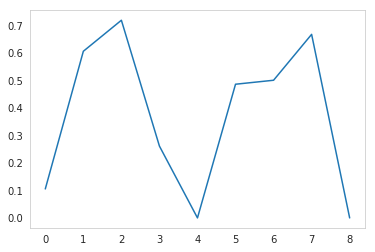

In [159]:
plt.plot(arr_2)

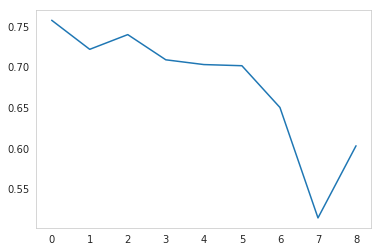

In [160]:
plt.plot(arr_3)

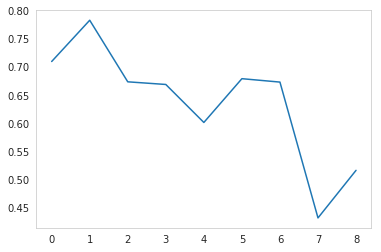

In [161]:
plt.plot(arr_4)

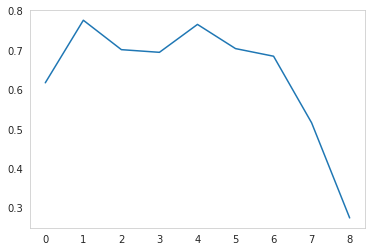

In [162]:
plt.plot(arr_5)

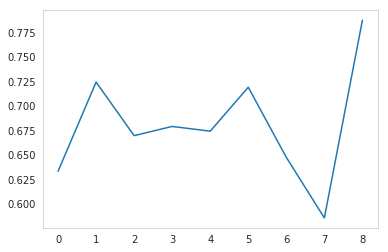

In [163]:
plt.plot(arr_6)

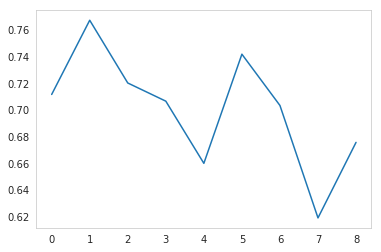

In [164]:
plt.plot(arr_7)

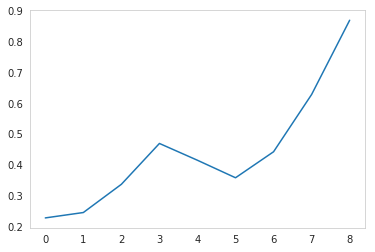

In [165]:
plt.plot(arr_8)

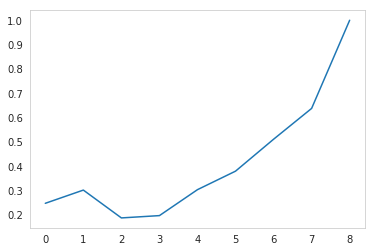

In [166]:
plt.plot(arr_9)

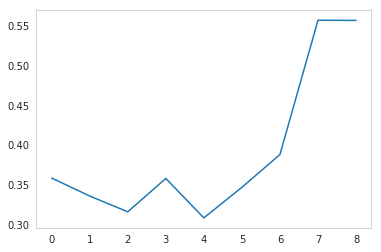

In [167]:
plt.plot(arr_10)

Ну что я могу сказать: вроде бы закономерность есть, но что-то кажется, что это очень страненькое( 

---

Далее попробуем обучится на всех людях из 10 часового пояса и из 3 подобрать людей максимально похожих по возрасту и полу:

In [172]:
df_Users_data = pd.read_csv('Good_UsersData.csv')

In [180]:
df_Users_data.loc[df_Users_data.Timezone == 10]

,1xFOhgzYEZU,unti_id,FirstName,LastName,PostIndex,City,Region,Timezone,Sex,Age
9,sashanka,10528,Александра,Агаркова,690014.0,ВЛАДИВОСТОК,ПРИМОРСКИЙ КРАЙ,10.0,female,44
28,nastya0000-96,17111,Анастасия,Анкудинова,690002.0,ВЛАДИВОСТОК,ПРИМОРСКИЙ КРАЙ,10.0,female,21
77,onbenderskaya,14579,Ольга,Бендерская,680000.0,ХАБАРОВСК,ХАБАРОВСКИЙ КРАЙ,10.0,female,39
82,bobovskayaus,15427,Ульяна,Бобовская,680015.0,ХАБАРОВСК,ХАБАРОВСКИЙ КРАЙ,10.0,female,34
91,boldurev16,11142,Владислав,Болдырев,681024.0,КОМСОМОЛЬСК-НА-АМУРЕ,ХАБАРОВСКИЙ КРАЙ,10.0,male,26
119,vershinindim,15420,Дмитрий,Вершинин,690000.0,ВЛАДИВОСТОК,ПРИМОРСКИЙ КРАЙ,10.0,male,27
129,vorontsovaea,10483,Евгения,Воронцова,690000.0,ВЛАДИВОСТОК,ПРИМОРСКИЙ КРАЙ,10.0,female,35
170,egoryachenko,12661,Екатерина,Горяченко,690000.0,ВЛАДИВОСТОК,ПРИМОРСКИЙ КРАЙ,10.0,female,41
190,oguseva,19473,Ольга,Гусева,680000.0,ХАБАРОВСК,ХАБАРОВСКИЙ КРАЙ,10.0,female,38
232,kirillerukov,13648,Кирилл,Еруков,690000.0,ВЛАДИВОСТОК,ПРИМОРСКИЙ КРАЙ,10.0,male,31


In [178]:
df_Users_data.loc[(df_Users_data.Timezone == 3) & (df_Users_data.Age == '44')]

,1xFOhgzYEZU,unti_id,FirstName,LastName,PostIndex,City,Region,Timezone,Sex,Age
27,nandronova,12783,Наталья,Андронова,101000.0,МОСКВА,МОСКВА,3.0,female,44
56,aSpNXjaYEhn,15789,Алексей,Барышкин,190000.0,САНКТ-ПЕТЕРБУРГ,САНКТ-ПЕТЕРБУРГ,3.0,male,44
101,bskan,14948,Сергей,Бочаров,603163.0,НИЖНИЙ-НОВГОРОД,НИЖЕГОРОДСКАЯ ОБЛАСТЬ,3.0,male,44
174,m_grebennikov,12785,Максим,Гребенников,101000.0,МОСКВА,МОСКВА,3.0,male,44
248,autist2000,16103,Жан,Загидуллин,101000.0,МОСКВА,МОСКВА,3.0,male,44
276,idmi,12948,Дмитрий,Иванченко,142400.0,НОГИНСК,МОСКОВСКАЯ ОБЛАСТЬ,3.0,male,44
520,alexandernatalchenko,17476,Александр,Натальченко,350049.0,КРАСНОДАР,КРАСНОДАРСКИЙ КРАЙ,3.0,male,44
590,npZokUOTqrVD,67,Наталья,Подсосонная,101000.0,МОСКВА,МОСКВА,3.0,female,44
784,irinafilipova,11099,Ирина,Филипова,603087.0,НИЖНИЙ-НОВГОРОД,НИЖЕГОРОДСКАЯ ОБЛАСТЬ,3.0,female,44


In [ ]:
nandronova